## Loading Data and Info

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv("drive/MyDrive/DSML/NYChousing.csv")

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22073 entries, 0 to 22072
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Boro-Block-Lot           22073 non-null  object 
 1   Address                  22073 non-null  object 
 2   Neighborhood             22073 non-null  object 
 3   Building Classification  22073 non-null  object 
 4   Total Units              22073 non-null  int64  
 5   Year Built               22000 non-null  float64
 6   Gross SqFt               22073 non-null  int64  
 7   Estimated Gross Income   22073 non-null  int64  
 8   Estimated Expense        22072 non-null  float64
 9   Net Operating Income     22073 non-null  int64  
 10  Full Market Value        22071 non-null  float64
 11  Report Year              22073 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.0+ MB


In [30]:
data = data.drop(["Boro-Block-Lot"], axis=1)

In [31]:
data.head()
data = data.drop(data[data['Year Built'] == 0].index)

Filter only top neighborhoods

In [32]:
data['Neighborhood'] = data['Neighborhood'].replace({'UPPER WEST SIDE (59-79)': 'UPPER WEST SIDE',
                                                 'UPPER EAST SIDE (79-96)': 'UPPER EAST SIDE',
                                                  'UPPER EAST SIDE (59-79)': 'UPPER EAST SIDE',
                                                 'UPPER WEST SIDE (79-96)': 'UPPER WEST SIDE',
                                                  'UPPER WEST SIDE (59-79)': 'UPPER EAST SIDE',
                                                     'UPPER WEST SIDE (96-116)': 'UPPER WEST SIDE',})
n_counts = data['Neighborhood'].value_counts()
selected_n = n_counts[n_counts >= 300].index
data = data[data["Neighborhood"].isin(selected_n)]

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Units,12129.0,6.500717e+01,9.217159e+01,1.0,15.0,30.0,76.0,1258.0
Year Built,12100.0,1.967684e+03,4.082314e+01,1853.0,1925.0,1986.0,2005.0,2018.0
Gross SqFt,12129.0,8.077065e+04,1.101817e+05,1.0,19031.0,39438.0,95307.0,1496819.0
Estimated Gross Income,12129.0,3.130815e+06,4.956485e+06,34.0,488295.0,1211044.0,3540964.0,61653975.0
Estimated Expense,12129.0,9.750813e+05,1.488974e+06,12.0,165915.0,392770.0,1110615.0,21194957.0
Net Operating Income,12129.0,2.155733e+06,3.525843e+06,22.0,316701.0,794470.0,2415735.0,43003610.0
Full Market Value,12127.0,1.685154e+07,2.762959e+07,31.0,2439499.5,6142999.0,18896498.5,346132985.0
Report Year,12129.0,2.015454e+03,2.291302e+00,2012.0,2013.0,2016.0,2017.0,2019.0


## Data Exploration

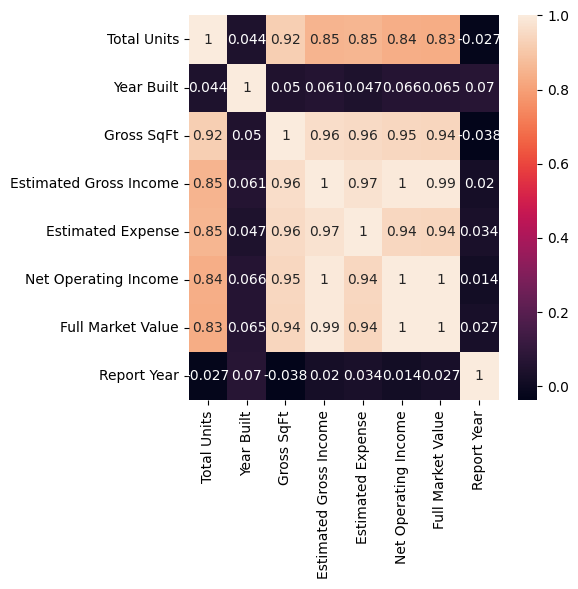

In [36]:
numerical_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(5,5))
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

Highest correlations
*   Estimated Expense x Estimate Gross Income
*   Gross Sq Feet x Estimated Expense
*   Gross Sq Feet x Estimate Gross Income
*   Estimate Gross Income x Full Market Value
*   Estimate Gross Income x Net Operating Income
*   Estimate Gross Income x Full Market Value
*   Estimated Expense x Full Market Value
*   Estimated Expense x Net Operating Income
*   Net Operating Income x Full Market Value

Lowest:
*   Report Year
*   Year Built





<Axes: xlabel='Estimated Expense', ylabel='Estimated Gross Income'>

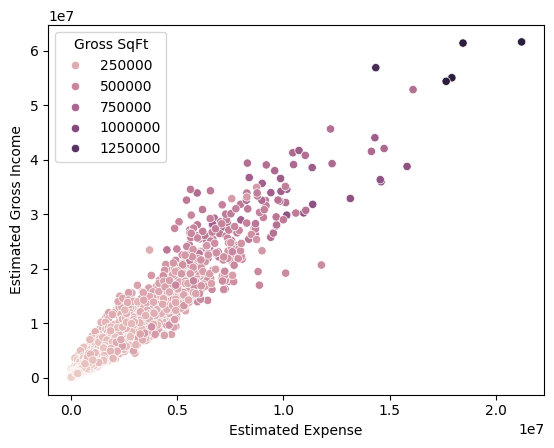

In [37]:
sns.scatterplot(data=data, x="Estimated Expense", y="Estimated Gross Income", hue="Gross SqFt")

<Axes: xlabel='Net Operating Income', ylabel='Full Market Value'>

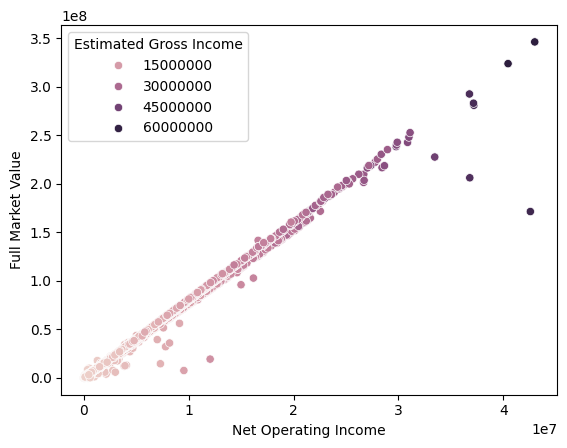

In [38]:
sns.scatterplot(x = "Net Operating Income", y = "Full Market Value", data = data, hue="Estimated Gross Income")

<Axes: xlabel='Year Built', ylabel='Count'>

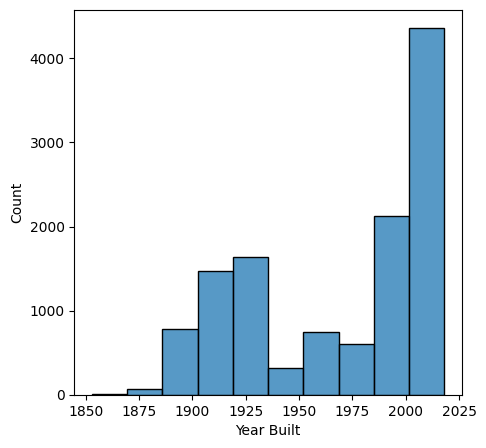

In [39]:
plt.figure(figsize=(5,5))
sns.histplot(x = "Year Built", data = data, bins=10)

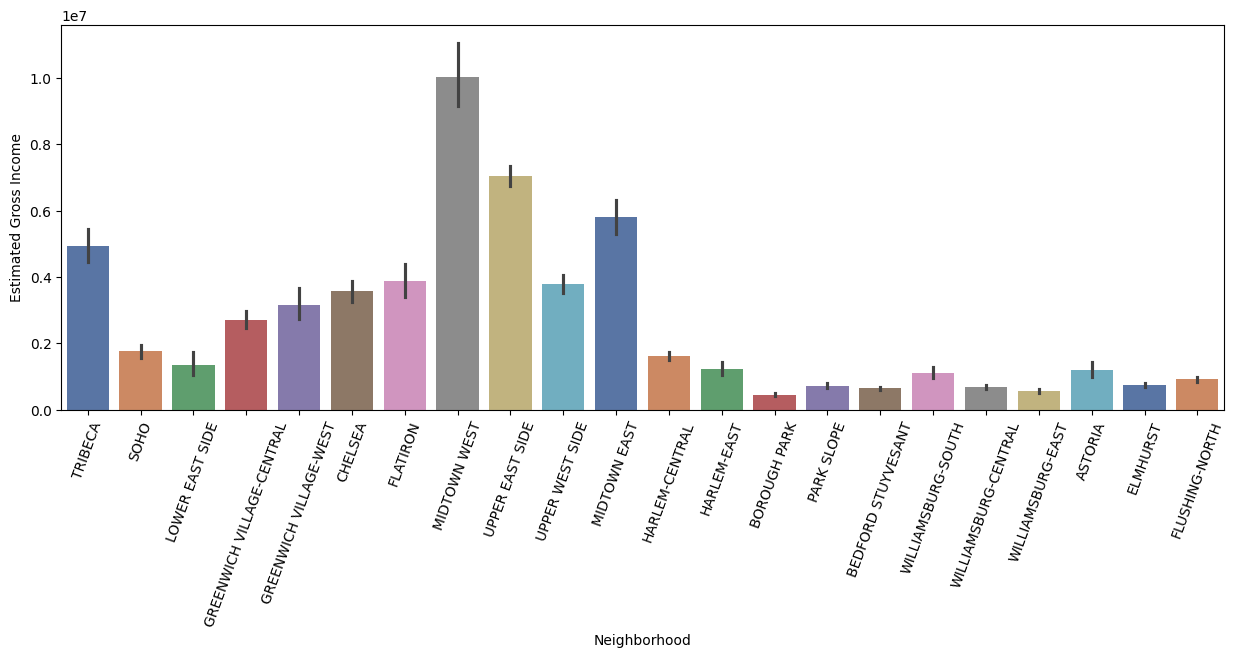

In [40]:
plt.figure(figsize=(15,5))
colors = sns.color_palette("deep")
ax1 = sns.barplot(x = "Neighborhood", y = "Estimated Gross Income", data = data, palette = colors)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)
plt.show()

## Scaling Data

In [41]:
scaler = StandardScaler()
data = data.dropna(subset=['Year Built', 'Report Year', 'Full Market Value'])
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
numerical_df = data[numerical_cols]
scaled_df=pd.DataFrame(scaler.fit_transform(numerical_df), columns=numerical_cols)
scaled_df.head()

,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year
0,1.884812,0.423989,1.256694,0.793131,0.129407,1.060295,1.000838,-1.512192
1,0.735781,0.448488,0.533268,0.548750,0.460989,0.576729,0.534903,-1.512192
2,0.475623,0.423989,0.218429,0.268981,0.103902,0.334242,0.092162,-1.512192
3,0.453943,0.448488,0.059544,0.107095,0.043494,0.132181,0.106578,-1.512192
4,1.971531,0.472987,1.586323,1.343308,1.021664,1.456903,1.382981,-1.512192


## K-Means Clustering

In [42]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

#Silhouette score
from sklearn.metrics import silhouette_score

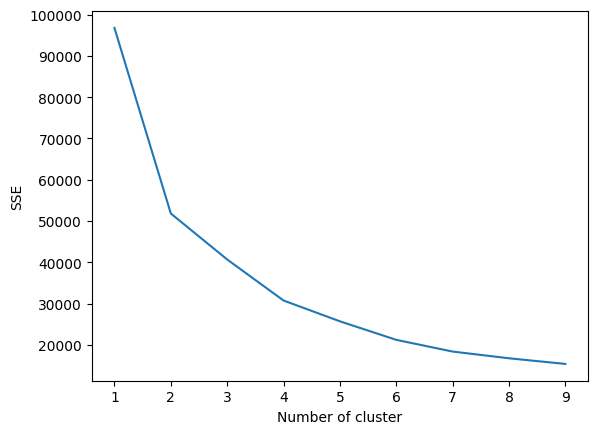

In [43]:
sse = {}
for k in range(1, 10):
  kmeans = KMeans(n_clusters=k, random_state=1).fit(scaled_df)
  sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
# chose between 2 and 8 clusters

In [44]:
df = data.copy()
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(scaled_df)
sdf_copy = scaled_df.copy(deep= True)

sdf_copy['KMeans_Labels'] = kmeans.predict(scaled_df)
df['KMeans_Labels'] = kmeans.predict(scaled_df)

In [49]:
df['KMeans_Labels'].value_counts()

4        1
5        1
6        0
7        0
8        1
        ..
22021    0
22022    0
22024    0
22028    0
22035    0
Name: KMeans_Labels, Length: 12098, dtype: int32


In [51]:
mean = df.groupby('KMeans_Labels').mean(numeric_only=True)
median = df.groupby('KMeans_Labels').median(numeric_only=True)
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Total Units,3.280962e+01,1.631995e+02,3.873731e+02,22.0,152.0,354.0
Year Built,1.965976e+03,1.974757e+03,1.976055e+03,1987.0,1986.0,1985.0
Gross SqFt,4.027762e+04,2.005824e+05,5.035184e+05,29153.0,187906.0,454272.0
Estimated Gross Income,1.313480e+06,8.370908e+06,2.276568e+07,855672.0,7516002.0,20010517.0
Estimated Expense,4.250396e+05,2.621201e+06,6.630593e+06,280770.0,2421342.0,5955068.5
Net Operating Income,8.884405e+05,5.749707e+06,1.613509e+07,561902.0,5112871.0,14402181.5
Full Market Value,6.914254e+06,4.504882e+07,1.263242e+08,4311997.0,40132000.0,112289030.0
Report Year,2.015455e+03,2.015490e+03,2.015485e+03,2016.0,2016.0,2016.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12098 entries, 4 to 22035
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Address                  12098 non-null  object 
 1   Neighborhood             12098 non-null  object 
 2   Building Classification  12098 non-null  object 
 3   Total Units              12098 non-null  int64  
 4   Year Built               12098 non-null  float64
 5   Gross SqFt               12098 non-null  int64  
 6   Estimated Gross Income   12098 non-null  int64  
 7   Estimated Expense        12098 non-null  float64
 8   Net Operating Income     12098 non-null  int64  
 9   Full Market Value        12098 non-null  float64
 10  Report Year              12098 non-null  int64  
 11  KMeans_Labels            12098 non-null  int32  
dtypes: float64(3), int32(1), int64(5), object(3)
memory usage: 1.2+ MB


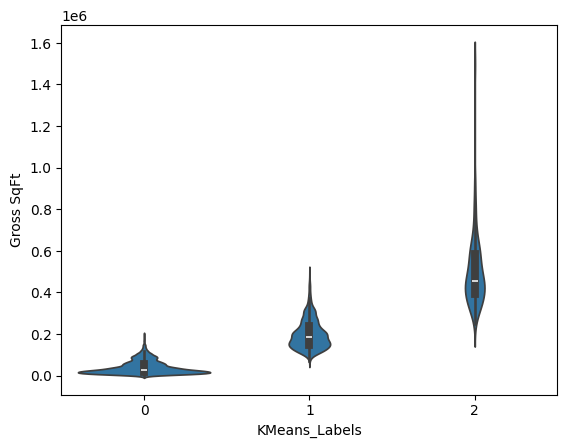

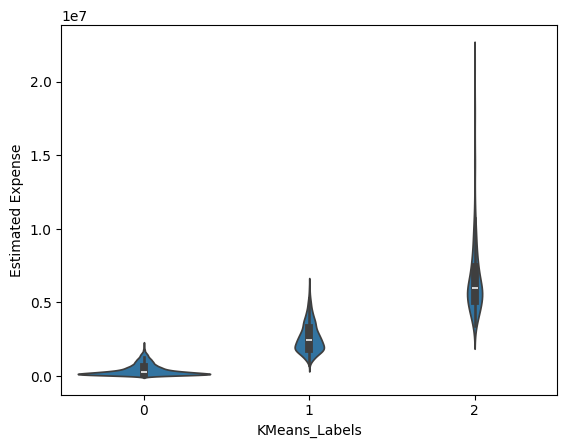

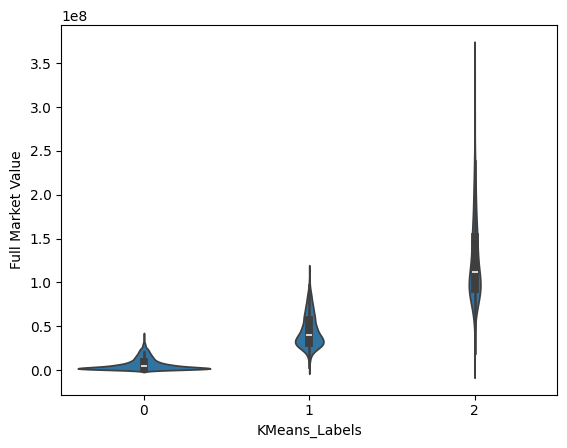

In [53]:
cols = ['Gross SqFt', 'Estimated Expense', 'Full Market Value']

for col in cols:
    sns.violinplot(x = 'KMeans_Labels', y = col, data = df)
    plt.show()

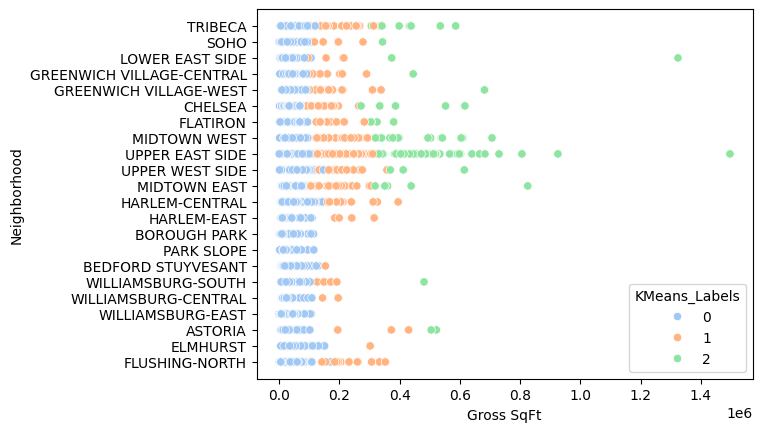

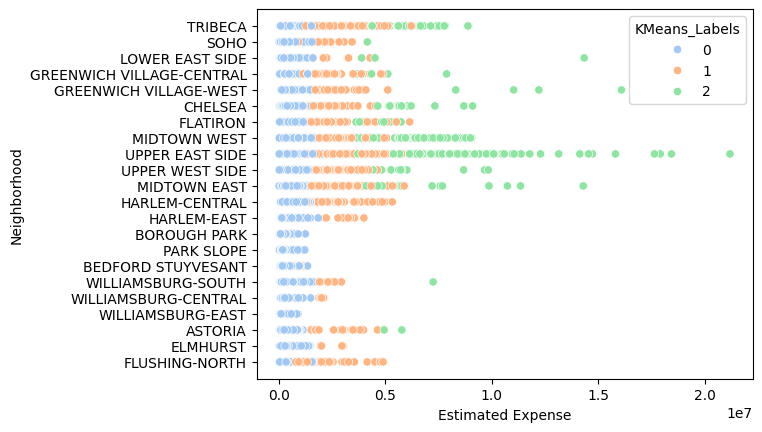

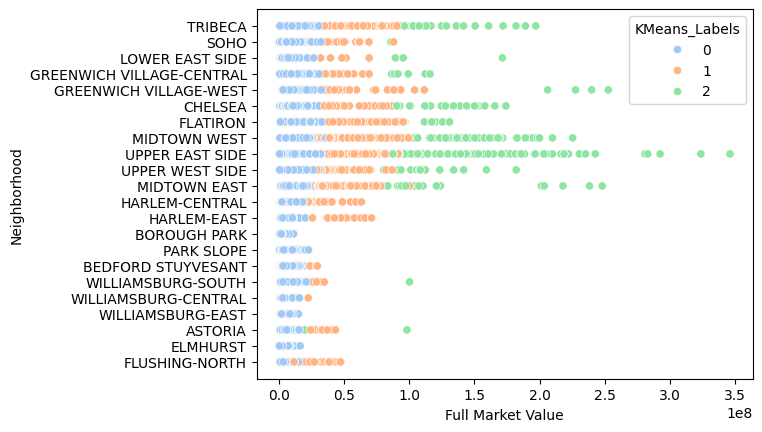

In [54]:
for col in cols:
    sns.scatterplot(x = col, y = 'Neighborhood',data = df ,hue='KMeans_Labels', palette='pastel')
    plt.show()

Cluster 0 -> lowest values, expenses, and size
Cluster 1 -> middle values, expenses, and size
Cluster 2 -> highest values, expenses, and size

## PCA

In [55]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'scaled_df' is your DataFrame
n = scaled_df.shape[1]
print("Number of features: " + str(n))

# Applying PCA
pca = PCA(n_components=n, random_state=1)
pca_data = pd.DataFrame(pca.fit_transform(scaled_df))

# Percent variance
exp_var = pca.explained_variance_ratio_

Number of features: 8


In [56]:
pc_comps = ['PC1', 'PC2', 'PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:3,:],2),index=pc_comps,columns=numerical_cols)

PC1 -> Gross SqFt, Est. Gross Income, Est. Expense, NOI, Full Market Val
PC2 -> Year Built, Report Year
PC3 -> Year Build, Report Year

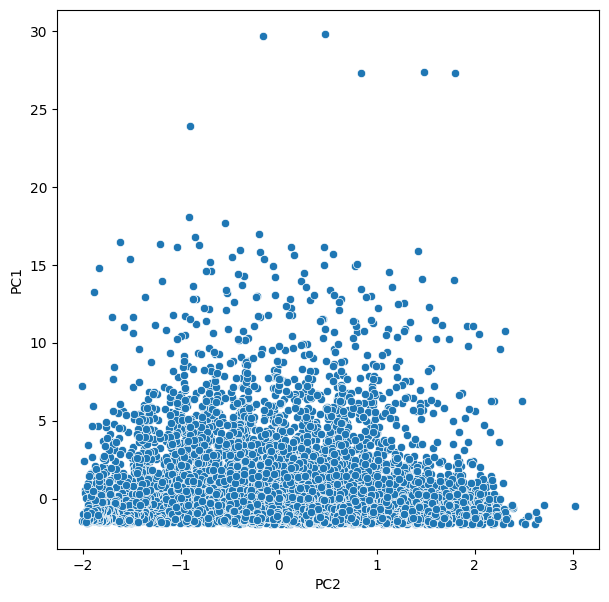

In [57]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=pca_data[1],y=pca_data[0])
plt.xlabel("PC2")
plt.ylabel("PC1")
plt.show()